## Salaries by Region and College Type Data Set

### Part 1 - Motivating question: What is the purpose of the experiement?

We want to explore this data set and find out the if there is a huge difference in salary by program between the different universities and colleges throughout the United States of America. 

<b>By each school type, does being in a different region of United States of America affect your salary at graduation and mid-career? By how much?</b>



In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math

In [195]:
# Getting the the first data set of salaries by region
df = pd.read_csv("salaries-by-region.csv")
df.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [196]:
# Getting the the second data set of salaries by college type
df1=pd.read_csv('salaries-by-college-type.csv')
df1.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [197]:
# get sum of null values
df.isnull().sum().sort_values()

School Name                           0
Region                                0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 10th Percentile Salary    47
Mid-Career 90th Percentile Salary    47
dtype: int64

In [198]:
# get sum of null values
df1.isnull().sum().sort_values()

School Name                           0
School Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 10th Percentile Salary    38
Mid-Career 90th Percentile Salary    38
dtype: int64

Checking to see if there is any null values within our data set. If there is, drop the column or fill/remove the null values.

In [199]:
df_1=df[['School Name','Region','Starting Median Salary','Mid-Career Median Salary']]
df_2=df1[['School Name','School Type']]
df_3=pd.merge(df_1,df_2)
df_3.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,School Type
0,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",Engineering
1,Harvey Mudd College,California,"$71,800.00","$122,000.00",Engineering
2,"University of California, Berkeley",California,"$59,900.00","$112,000.00",State
3,Occidental College,California,"$51,900.00","$105,000.00",Liberal Arts
4,Cal Poly San Luis Obispo,California,"$57,200.00","$101,000.00",State


Merging these two data sets and dropping the other columns such as Mid-Career "#th" Percentile Salary as the columns aren't relevent for what we are predicting and some of these columns have null values

### Part 2 - Methodology: How did you implement the experiment?

First by loading and combinding data sets, changing column types, filtering out columns and outliers, and exploring the data. We decided with the different classes we have with that data set, we are doing a classification and regression model for this project.

In [200]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   School Name               268 non-null    object
 1   Region                    268 non-null    object
 2   Starting Median Salary    268 non-null    object
 3   Mid-Career Median Salary  268 non-null    object
 4   School Type               268 non-null    object
dtypes: object(5)
memory usage: 12.6+ KB


From above it looks like that all the variables are object in our new data set.

In [201]:
# Changing columns that were miscategorized as an object and changing it to the appropriate type
df_3['Region']=df_3['Region'].astype('category')
df_3['School Type']=df_3['School Type'].astype('category')
df_3[df_3.columns[2:4]]=df_3[df_3.columns[2:4]].replace('[\$,]', '',regex=True).astype(float)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   School Name               268 non-null    object  
 1   Region                    268 non-null    category
 2   Starting Median Salary    268 non-null    float64 
 3   Mid-Career Median Salary  268 non-null    float64 
 4   School Type               268 non-null    category
dtypes: category(2), float64(2), object(1)
memory usage: 9.3+ KB


In [202]:
# Checking to see if there is any null values within our data set. If there is, drop the column or fill/remove the null values.
df_3.isnull().sum().sort_values()

School Name                 0
Region                      0
Starting Median Salary      0
Mid-Career Median Salary    0
School Type                 0
dtype: int64

<p>If there are missing values, we would remove them with dropna</p>
<p>df_3=df_3.dropna()</p>
<p>df_3.isna().sum()</p>

In [203]:
# Start exploring the data
df_3.describe()

,Starting Median Salary,Mid-Career Median Salary
count,268.000000,268.000000
mean,46043.656716,83944.402985
std,6411.734098,14361.799310
min,34800.000000,43900.000000
25%,42000.000000,73950.000000
50%,44700.000000,81650.000000
75%,48150.000000,92350.000000
max,75500.000000,134000.000000


VISUALIZATION

Using the count plot to the visualization of counts of observations in each categorical bin(Region and Schoool Type) using bars.

<AxesSubplot:xlabel='School Type', ylabel='count'>

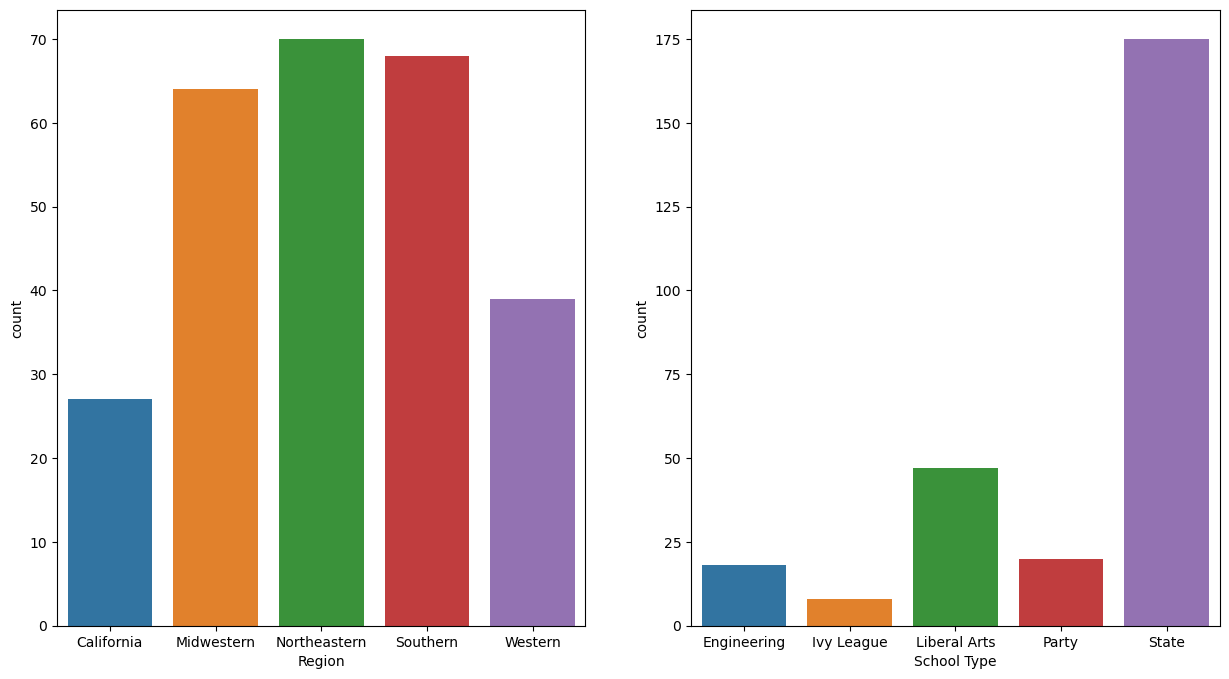

In [204]:
# Countplots for Region and school type
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.countplot(x='Region',data=df_3, ax=ax[0])
sns.countplot(x='School Type', data=df_3,ax=ax[1])

The above visualization of count plot shows, Midwestern, Northeastern and southern region are close in counts of schools. In terms of counts  the northeastern region has height count of school and California has the lowest count.

<br>Similarly for count of school pertaining to school type shows that state universities( university managed by the public authorities of a particular US state) are much higher in number than other college type. The reputed IVY League colleges have comparitively smallest count. The Ivy League is an American collegiate athletic conference comprising eight private research universities in the Northeastern United States. The term Ivy League is typically used beyond the sports context to refer to the eight schools as a group of elite colleges with connotations of academic excellence, selectivity in admissions, has the lowest count for number of colleges.

<br> Although, having lowest count IVY college are highly reputed in USA therefore they have significant impact in terms of college rating as well as Salaries in Northeastern region and therefore, a must to include in our data.

<AxesSubplot:xlabel='School Type', ylabel='Mid-Career Median Salary'>

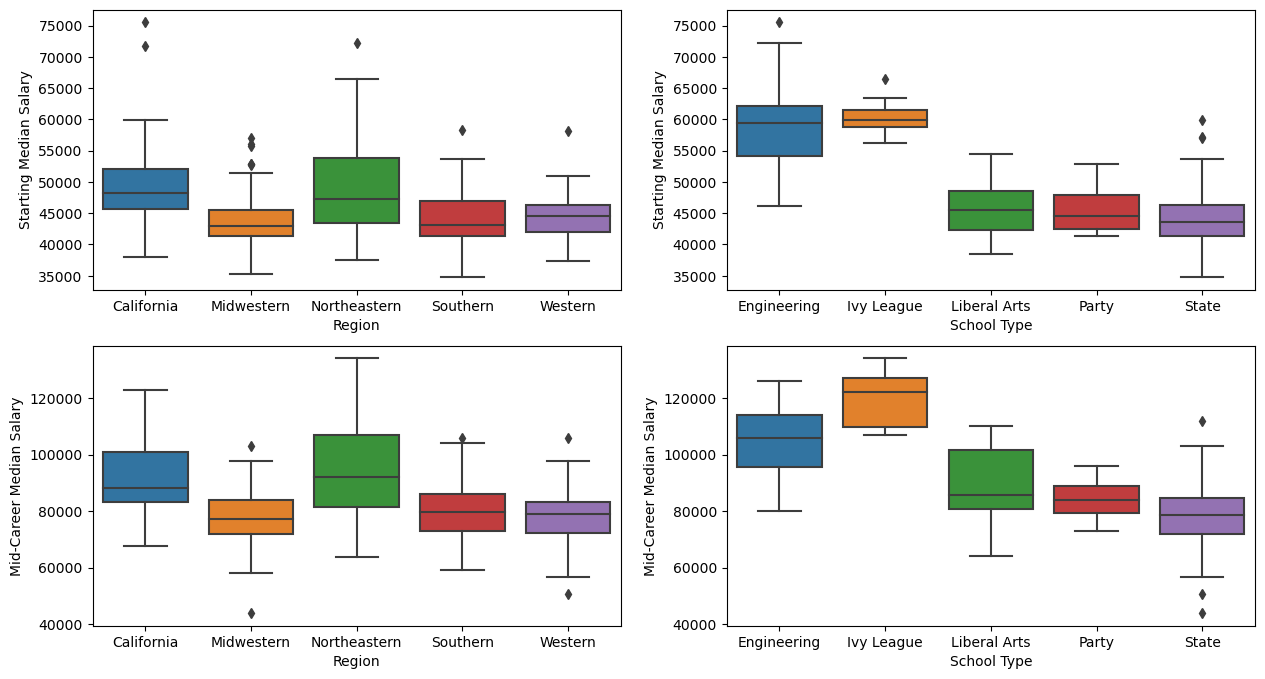

In [205]:
#Categorical Plotting
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
sns.boxplot(x='Region',y='Starting Median Salary',data=df_3,ax=ax[0,0])
sns.boxplot(x='School Type',y='Starting Median Salary',data=df_3,ax=ax[0,1])
sns.boxplot(x='Region',y='Mid-Career Median Salary',data=df_3,ax=ax[1,0])
sns.boxplot(x='School Type',y='Mid-Career Median Salary',data=df_3,ax=ax[1,1])

Some general observations about BOX PLOTS for STARTING SALARIES AND MID-CAREER-MEDIAN SALARY: 
<br> 
<br> BY REGION:
<br>
<br>It is observed from the boxplot comparing salary by region wise that the median salary pattern for both starting and mid-career shows quite similar pattern 
<br> 
<br> In California (Blue): The starting median salary little more than $45,000 which is higher than the starting salary in other regions. The mid-career median salary is quite close to Northeastern region university where most of the IVY League universities resides.
<br> 
<br> Northeastern Region (Green): The Northeastern region where most of IVY colleges are situated, have highest mid-career median salary. Therefore, shows promising future career progression with higher monetary benefits.
<br> 
<br> Midwestern (Orange), Southern (Red) and Western (Purple): The Southern, Midwestern, Western starting median salary as well as mid-career median salary are quite close but lower than the colleges in California or Northeastern region.
<br>
<br>BY SCHOOL TYPE:
<br>
<br>IVY League colleges and engineering colleges have highest starting median salaries by school type, where:

<br>IVY League(Orange): Ivy league colleges have highest starting median salary (close to $60,000) than any other school type. The mid-Career median salary for IVY League colleges are way more than any other type of colleges going more than $200,000 per annum.

<br>Engineering colleges (Blue): Engineering have almost same starting median salary as IVY schools. The mid-career median salary for Engineering colleges graduates is less than $150,000.

<br> IVY schools and Engineering schools have almost same median starting salary but there is significant difference in Mid-Career median salary.
<br> When it comes to mid-career stage, the IVY colleges graduates are getting way more approx. $200,000, whereas the mid-career median salary for engineering college graduate is less than $150,000.

<br>Liberal arts (Orange), Party (Red) and state (Purple): These school type have lowest staring median salary as compared to Engineering or IVY colleges with state universities graduate starting median salary is lowest. However, the Liberal art graduate are showing highest mid-career median salary among these three.
<br>
<br> All and all the IVY league colleges and Engineering colleges have highest starting and mid-career salaries.
<br> In terms of region northeastern universities have highest starting and mid-career salaries.
<br>
<br>


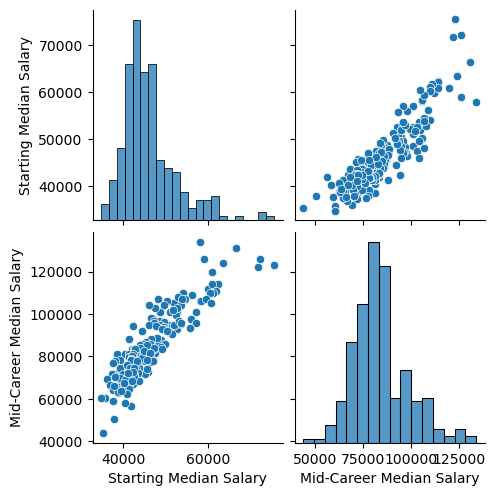

In [206]:
# Visual correlation and distributions
sns.pairplot(df_3)

By looking at the pairplot, there are no big outliers that we would filter that could skew the data

In [207]:
#One hot Coding:
df2 = df_3.drop(columns={'School Name'})
df3 = pd.get_dummies(df2)
df3.head()

,Starting Median Salary,Mid-Career Median Salary,Region_California,Region_Midwestern,Region_Northeastern,Region_Southern,Region_Western,School Type_Engineering,School Type_Ivy League,School Type_Liberal Arts,School Type_Party,School Type_State
0,75500.0,123000.0,1,0,0,0,0,1,0,0,0,0
1,71800.0,122000.0,1,0,0,0,0,1,0,0,0,0
2,59900.0,112000.0,1,0,0,0,0,0,0,0,0,1
3,51900.0,105000.0,1,0,0,0,0,0,0,1,0,0
4,57200.0,101000.0,1,0,0,0,0,0,0,0,0,1


Instead of each categorical column of Region and School having several possible values, now each of those values is a column, and each row is true (or 1) in one of the columns and a false (or 0) for the others. 

In [208]:
df3["Region_California"].value_counts()

0    241
1     27
Name: Region_California, dtype: int64

#### Predictions for Starting Median Salary by using linear regression

In [209]:
y = np.array(df3["Starting Median Salary"]).reshape(-1,1)
y.shape
#Get a new df with only the features we'll use
df_ = df3.drop(columns={"Starting Median Salary","Mid-Career Median Salary"})
df_.head()

,Region_California,Region_Midwestern,Region_Northeastern,Region_Southern,Region_Western,School Type_Engineering,School Type_Ivy League,School Type_Liberal Arts,School Type_Party,School Type_State
0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1


In [210]:
#Make that df into an array. 
x = np.array(df_)
x.shape

(268, 10)

In [211]:
#shapes
print("X shape", x.shape)
print("Y shape", y.shape)

X shape (268, 10)
Y shape (268, 1)


In [212]:
#Setup
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn.model_selection import train_test_split

In [213]:
#Split data
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)
#Generate model 
model = LinearRegression().fit(xTrain,yTrain)

In [214]:
#Get some info on our new regression model
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

R-squared: 0.46517531783710186


In [215]:
#Our coefficent/slope is now an array of values - one per X. 
#Visualizing the regression would be a 14D space, where these are the slopes in each dimension. 
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

Intercept: 51054.948803067324
Coefs: [ 3656.86150857 -1183.27047309   -73.82942281 -1065.6524607
 -1334.10915196  7202.91113538 10658.88061974 -5109.95007472
 -5707.35794372 -7044.48373668]


In [216]:
#Get RMSE
tmp = model.predict(xTest)
mean_squared_error(tmp, yTest, squared=False)

5194.962145666821

In [217]:
#Get Residuals and picture them in a DF for easy reading. 
tmp1 = pd.DataFrame(yTest, columns={"Y values"})
tmp2 = pd.DataFrame(tmp, columns={"Predictions"})
tmp3 = pd.DataFrame((yTest-tmp), columns={"Residual"})
resFrame = pd.concat([tmp1,tmp2,tmp3], axis=1)
resFrame.head()

,Y values,Predictions,Residual
0,37300.0,42676.355914,-5376.355914
1,43600.0,42827.194593,772.805407
2,37800.0,43936.635644,-6136.635644
3,49900.0,45273.761437,4626.238563
4,40400.0,42944.812606,-2544.812606


In [218]:
#Statsmodels.
import statsmodels.api as sm

In [219]:
#Fit the model. 
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     35.36
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           4.99e-33
Time:                        19:48:31   Log-Likelihood:                -1803.4
No. Observations:                 187   AIC:                             3625.
Df Residuals:                     178   BIC:                             3654.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.647e+04    370.299     98.482      0.0

#### Predictions for Mid-Career Median Salary by using the linear regression

In [220]:
y1 = np.array(df3["Mid-Career Median Salary"]).reshape(-1,1)
y1.shape

(268, 1)

In [221]:
#Split data
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(x,y1,test_size=.3)
#Generate model 
model1 = LinearRegression().fit(xTrain1,yTrain1)

In [222]:
#Get some info on our new regression model
r_sq = model1.score(xTest1, yTest1)
print('R-squared:', r_sq)

R-squared: 0.37825926251059194


In [223]:
#Our coefficent/slope is now an array of values - one per X. 
#Visualizing the regression would be a 14D space, where these are the slopes in each dimension. 
print('Intercept:', model1.intercept_[0])
print('Coefs:', model1.coef_[0])

Intercept: 94809.68555283907
Coefs: [  9389.9038781   -4828.13235931   2657.4152447   -1912.88867134
  -5306.29809215   7388.05533241  22657.89920246  -4465.11280348
  -9934.73712659 -15646.10460479]


In [224]:
#Get RMSE
tmp1 = model1.predict(xTest1)
mean_squared_error(tmp1, yTest1, squared=False)

9685.65875999578

In [225]:
#Get Residuals and picture them in a DF for easy reading. 
tmp1m = pd.DataFrame(yTest1, columns={"Y values"})
tmp2m = pd.DataFrame(tmp1, columns={"Predictions"})
tmp3m = pd.DataFrame((yTest1-tmp1), columns={"Residual"})
resFrame1 = pd.concat([tmp1m,tmp2m,tmp3m], axis=1)
resFrame1.head()

,Y values,Predictions,Residual
0,80900.0,74335.448589,6564.551411
1,68400.0,77250.692277,-8850.692277
2,78500.0,74335.448589,4164.551411
3,85700.0,87532.363671,-1832.363671
4,85200.0,93001.987994,-7801.987994


In [226]:
#Fit the model. 
X2m = sm.add_constant(xTrain1)
estm = sm.OLS(yTrain1, X2)
est2m = estm.fit()
print(est2m.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.151
Date:                Mon, 12 Dec 2022   Prob (F-statistic):              0.331
Time:                        19:49:42   Log-Likelihood:                -2060.3
No. Observations:                 187   AIC:                             4139.
Df Residuals:                     178   BIC:                             4168.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         6.1e+04   1463.002     41.692      0.0

# Conclusions for Starting median salary

Based on the regression results, it shows that the different region in United States has higher significant impact on starting median salary since their p-values equal to 0. For school type such as Liberal Arts, Party, and State are not significantly affect our data. 

# Conclusion for Mid career median salary

Based on the regression results, it shows that the different region in United States except California has higher significant impact on Mid career median salary since their p-values equal to 0. For school type, except state university, they are not significantly affect our data. 